In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from skimage import img_as_ubyte

# Coordenadas cromáticas

In [2]:
#Cargamos las imágenes:
coordcrom_1 = cv.imread('CoordCrom_1.png')
coordcrom_1 = cv.cvtColor(coordcrom_1, cv.COLOR_BGR2RGB)

coordcrom_2 = cv.imread('CoordCrom_2.png')
coordcrom_2 = cv.cvtColor(coordcrom_2, cv.COLOR_BGR2RGB)

coordcrom_3 = cv.imread('CoordCrom_3.png')
coordcrom_3 = cv.cvtColor(coordcrom_3, cv.COLOR_BGR2RGB)

Text(0.5, 1.0, 'coordcrom_3')

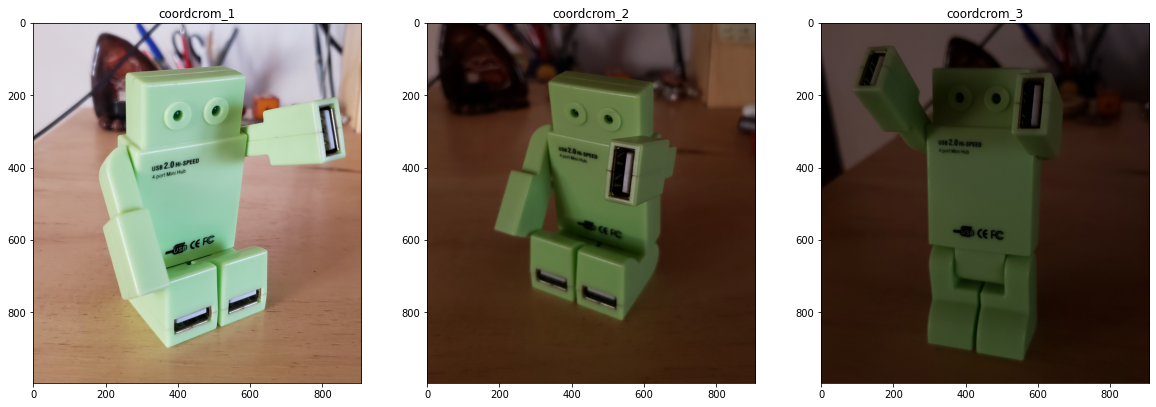

In [3]:
fig = plt.figure(figsize=(20,20))

ax1=plt.subplot(131)
ax1.imshow(coordcrom_1)
ax1.set_title('coordcrom_1')

ax2=plt.subplot(132)
ax2.imshow(coordcrom_2)
ax2.set_title('coordcrom_2')

ax3=plt.subplot(133)
ax3.imshow(coordcrom_3)
ax3.set_title('coordcrom_3')


In [4]:
def coordenadas_cromaticas(imagen):
    suma_b_g_r = np.sum(imagen,axis=2) + 0.000001
    imagen_updated = np.ones(imagen.shape)
    for i in range(3):
        imagen_updated[:,:,i] = imagen[:,:,i] / suma_b_g_r  
    return imagen_updated

Text(0.5, 1.0, 'coordcrom_3')

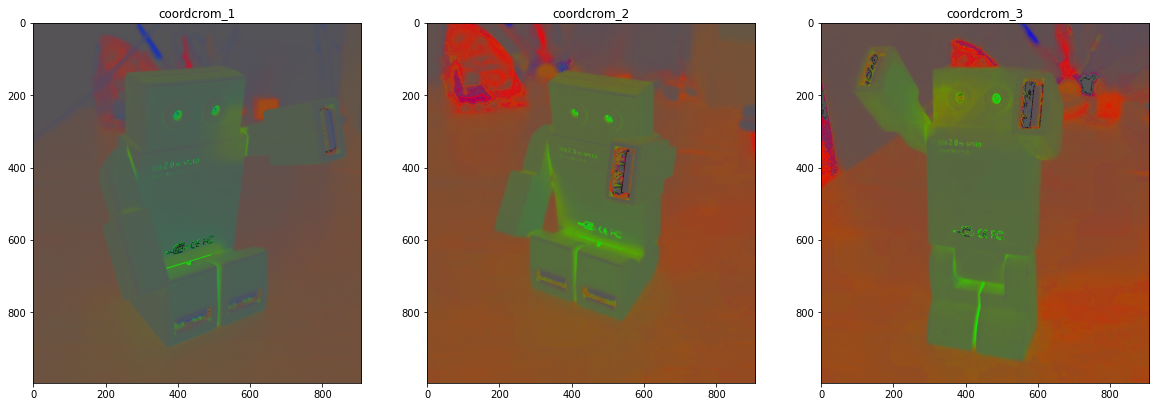

In [5]:
coordcrom_1_cromatica = coordenadas_cromaticas(coordcrom_1)
coordcrom_2_cromatica = coordenadas_cromaticas(coordcrom_2)
coordcrom_3_cromatica = coordenadas_cromaticas(coordcrom_3)

fig = plt.figure(figsize=(20,20))

ax1=plt.subplot(131)
ax1.imshow(coordcrom_1_cromatica)
ax1.set_title('coordcrom_1')

ax2=plt.subplot(132)
ax2.imshow(coordcrom_2_cromatica)
ax2.set_title('coordcrom_2')

ax3=plt.subplot(133)
ax3.imshow(coordcrom_3_cromatica)
ax3.set_title('coordcrom_3')

# White Patch

In [6]:
#Cargamos las imágenes:
wp_b = cv.imread('WP_B.png')
wp_b = cv.cvtColor(wp_b, cv.COLOR_BGR2RGB)

wp_o = cv.imread('WP_O.png')
wp_o = cv.cvtColor(wp_o, cv.COLOR_BGR2RGB)

wp_r = cv.imread('WP_R.png')
wp_r = cv.cvtColor(wp_r, cv.COLOR_BGR2RGB)

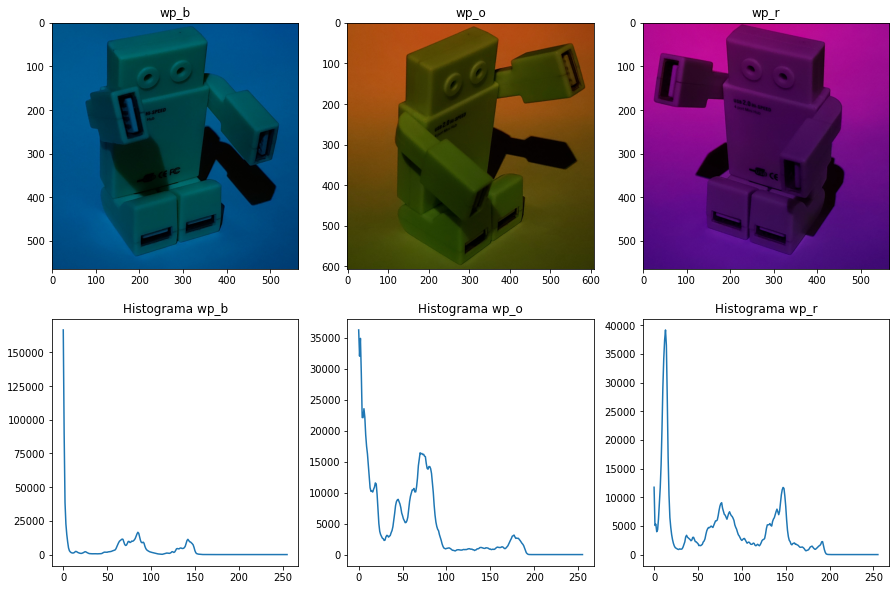

In [7]:
fig = plt.figure(figsize=(15,10))

ax1=plt.subplot(231)
ax1.imshow(wp_b)
ax1.set_title('wp_b')

ax2=plt.subplot(232)
ax2.imshow(wp_o)
ax2.set_title('wp_o')

ax3=plt.subplot(233)
ax3.imshow(wp_r)
ax3.set_title('wp_r')


ax4=plt.subplot(234)
hist1,bins2 = np.histogram(wp_b.ravel(),256,[0,256])
ax4.set_title('Histograma wp_b')
plt.plot(hist1)

ax5=plt.subplot(235)
hist2,bins2 = np.histogram(wp_o.ravel(),256,[0,256])
ax5.set_title('Histograma wp_o')
plt.plot(hist2)

ax6=plt.subplot(236)
hist3,bins3 = np.histogram(wp_r.ravel(),256,[0,256])
ax6.set_title('Histograma wp_r')
plt.plot(hist3)

In [8]:
def plot_histograma(imagen):
    fig = plt.figure(figsize=(15,10))
    colors = ("red", "green", "blue")
    channel_ids = (0, 1, 2)
    
    ax=plt.subplot(232)
    ax.imshow(imagen)

    for channel_id, c in zip(channel_ids, colors):
        channel_ids=plt.subplot(int(str(23)+str(channel_id+4)))
        histogram, bin_edges = np.histogram(imagen[:, :, channel_id], bins=256, range=(0, 256))       
        plt.plot(bin_edges[0:-1], histogram, color=c)
        plt.xlabel("Color "+c)
    plt.show()

## Histogramas por colores

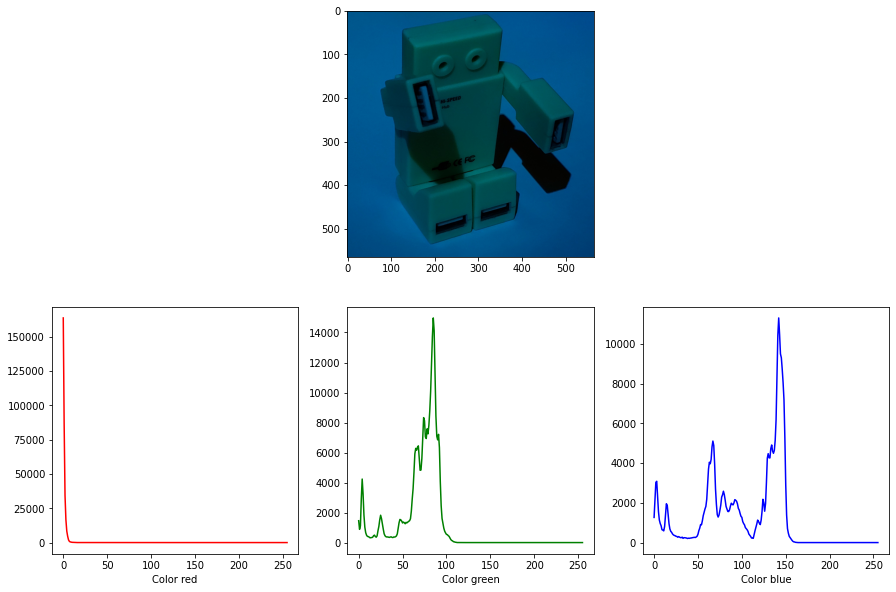

In [9]:
plot_histograma(wp_b)

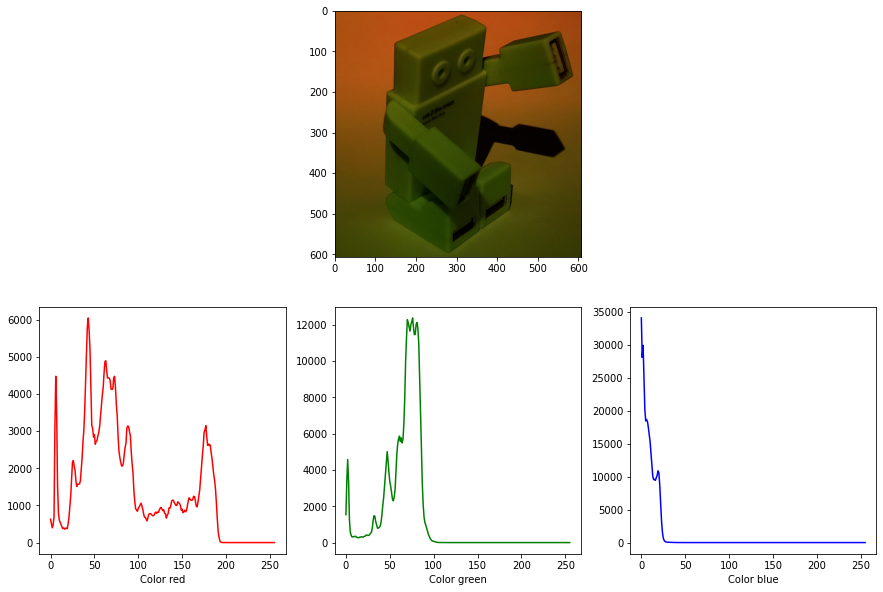

In [10]:
plot_histograma(wp_o)

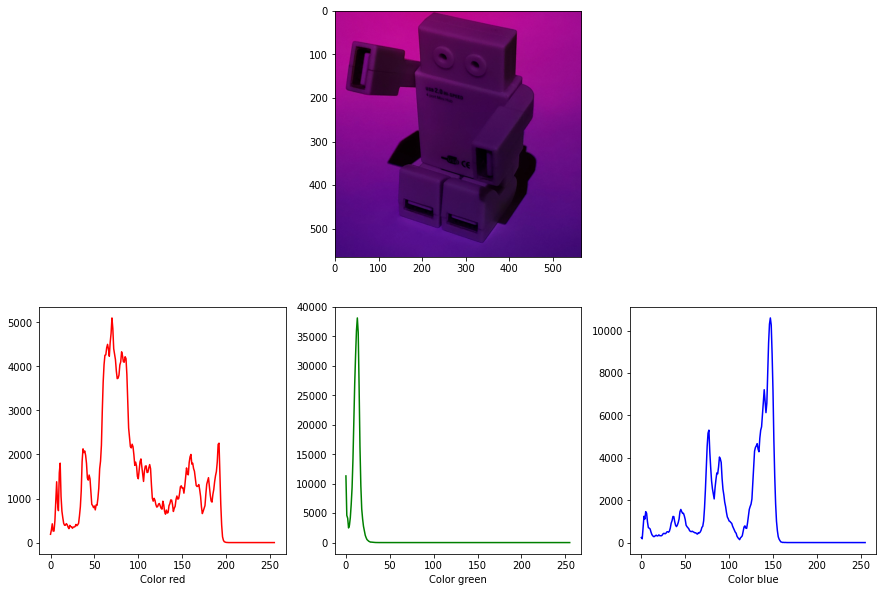

In [11]:
plot_histograma(wp_r)

In [12]:
def white_patch(imagen, percentil):
    imagen_updated = np.ones(imagen.shape)
    for channel, color in enumerate('rgb'):
        
        channel_values = imagen[:,:,channel]
        
        ma =  np.percentile(channel_values,100.0-percentil)
        
        imagen_updated[:,:,channel] = (imagen[:,:,channel]) * (255/(ma))
        
        imagen_updated = np.round(imagen_updated).astype(np.uint8)
        
        np.clip(imagen_updated, 0, 255, out=imagen_updated)
        
    return imagen_updated

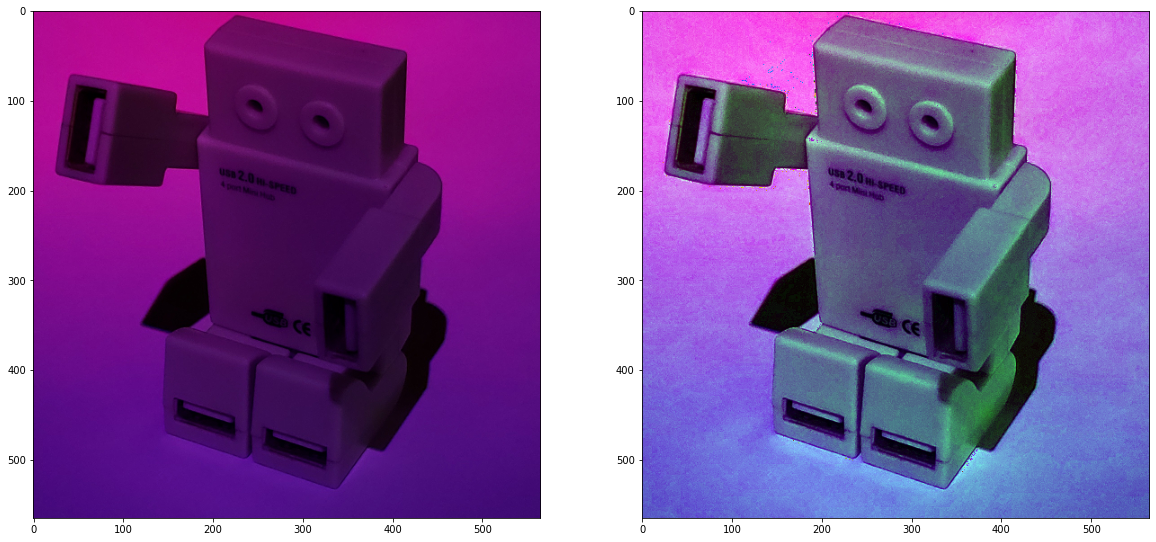

In [41]:
wp_r = cv.imread('WP_R.png')
wp_r = cv.cvtColor(wp_r, cv.COLOR_BGR2RGB)

wp_copy = np.copy(wp_r)
wp_modificado = white_patch(wp_copy, 0.05)

fig = plt.figure(figsize=(20,20))

ax1=plt.subplot(121)
ax1.imshow(wp_r)

ax1=plt.subplot(122)
ax1.imshow(wp_modificado)


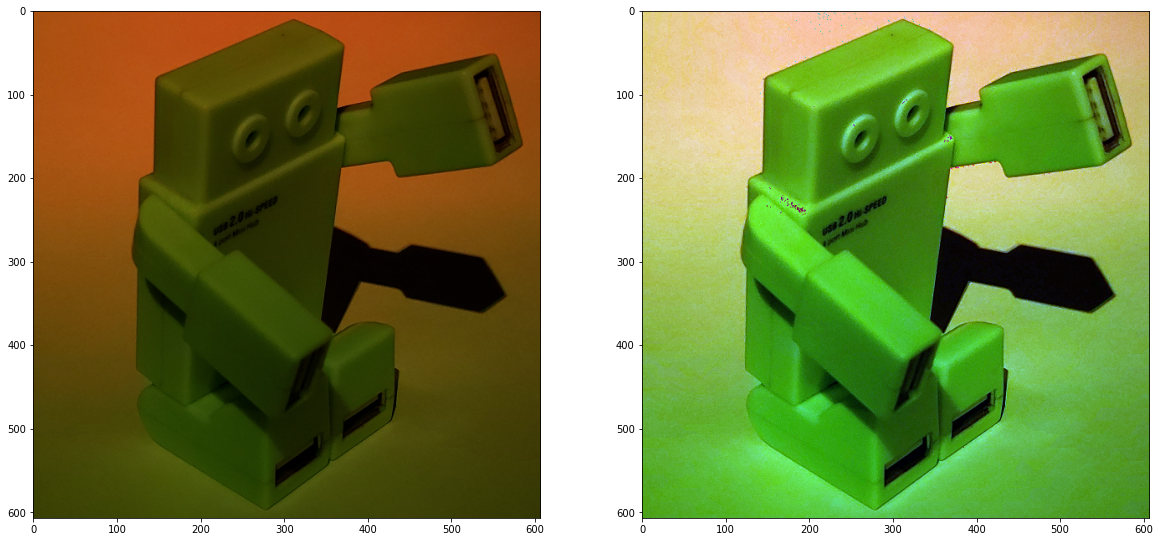

In [42]:
wp_o = cv.imread('WP_O.png')
wp_o = cv.cvtColor(wp_o, cv.COLOR_BGR2RGB)

wp_copy = np.copy(wp_o)
wp_modificado = white_patch(wp_copy, 0.05)

fig = plt.figure(figsize=(20,20))

ax1=plt.subplot(121)
ax1.imshow(wp_o)

ax1=plt.subplot(122)
ax1.imshow(wp_modificado)


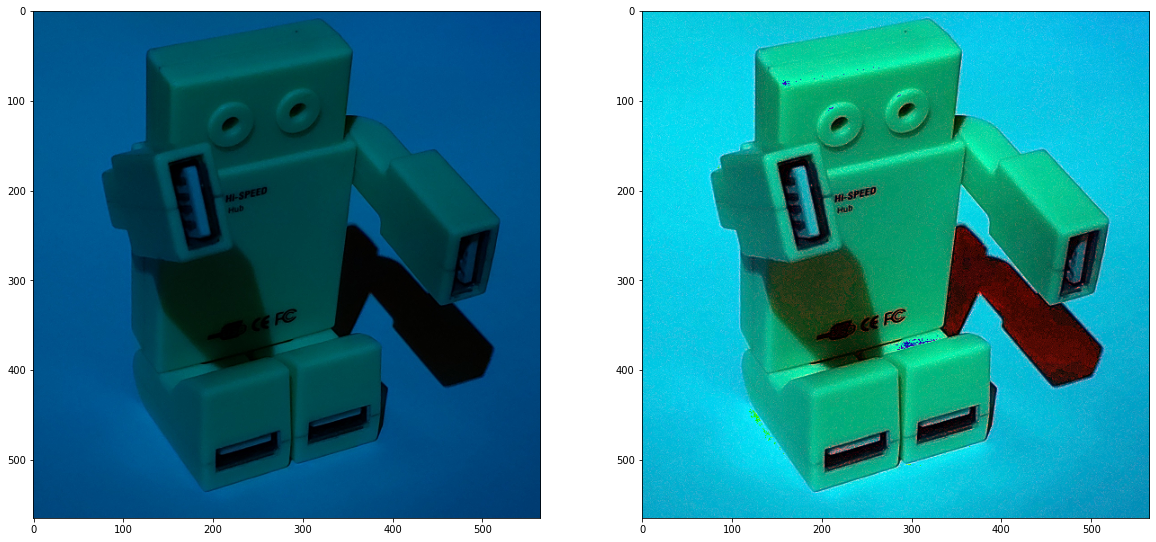

In [43]:
wp_b = cv.imread('WP_B.png')
wp_b = cv.cvtColor(wp_b, cv.COLOR_BGR2RGB)

wp_copy = np.copy(wp_b)
wp_modificado = white_patch(wp_copy, 0.05)

fig = plt.figure(figsize=(20,20))

ax1=plt.subplot(121)
ax1.imshow(wp_b)

ax1=plt.subplot(122)
ax1.imshow(wp_modificado)

# Prueba imagenes manos

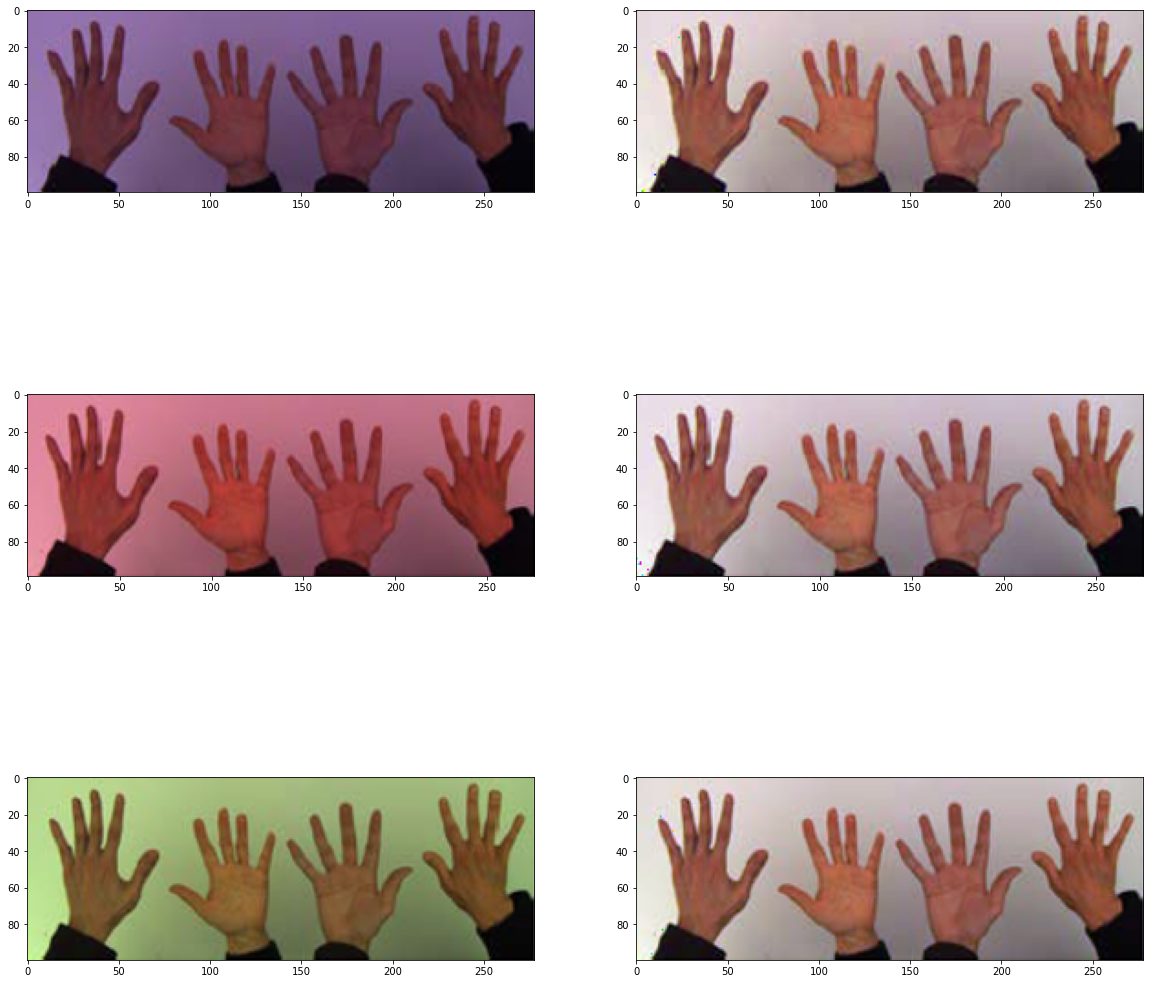

In [55]:
manos_blue = cv.imread('test_blue.png')
manos_blue = cv.cvtColor(manos_blue, cv.COLOR_BGR2RGB)

manos_red = cv.imread('test_red.png')
manos_red = cv.cvtColor(manos_red, cv.COLOR_BGR2RGB)

manos_green = cv.imread('test_green.png')
manos_green = cv.cvtColor(manos_green, cv.COLOR_BGR2RGB)


manos_blue_copy = np.copy(manos_blue)
manos_blue_corregida = white_patch(manos_blue_copy, 0.01)

manos_red_copy = np.copy(manos_red)
manos_red_corregida = white_patch(manos_red_copy, 0.01)

manos_green_copy = np.copy(manos_green)
manos_green_corregida = white_patch(manos_green_copy, 0.01)

fig = plt.figure(figsize=(20,20))

ax1=plt.subplot(321)
ax1.imshow(manos_blue)

ax1=plt.subplot(322)
ax1.imshow(manos_blue_corregida)

ax1=plt.subplot(323)
ax1.imshow(manos_red)

ax1=plt.subplot(324)
ax1.imshow(manos_red_corregida)

ax1=plt.subplot(325)
ax1.imshow(manos_green)

ax1=plt.subplot(326)
ax1.imshow(manos_green_corregida)